IN3190 Prosjekt oppgave


In [2]:
#først importerer det jeg trenger:
import numpy as np
from numpy import pi, exp, sin, log10
import matplotlib.pyplot as plt
from scipy.signal import tukey
import scipy.io

For det første oppgaven så skriver jeg en funksjon som konvolverer et input signal x(n) med en FIR filter h(n). Funksjonene skal returnere

In [3]:
def konvin3190(x,ylen,h):
    M, N = len(h), len(x)
    y = np.zeros(M+N-1)
    
    for m in range(1, M):
        for n in range(1,N):
            o = n+m-1
            y[o] = y[o] + x[n]*h[m]
            
    if ylen == 0: #needs to return out-signal with the length of 'x' signal
        a, b = int(np.floor(0.5*(M-1))), int(np.ceil(0.5*(M-1) +1))
        return y[b:int(M+N-1-a)]
    else:
        return y

Oppgave 1B: For den neste delen så skriver jeg en fuskjon 'frekspekin3190' som skal da ta inn signalet, og to parametere som bestemer hvor mange punkter til å sample og samplingsrekvensen. Funksjonen skal da returnere det komplekse frekvensspekteret og tilhørende frekvens 'f'. Etter det skal vi lage en funksjon som lager en liten filter som beskrevet i oppgave teksten.

In [4]:
def frekspekin3190(x, N, fs):
    X = np.zeros(N)
    w = np.linspace(0, pi, N)    #N-data punkter som omega(w)
    for i in range(N):
        for j in range(len(x)):
            X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))
    f = (w*fs)/(2*pi) # radiener per sample

    return X, f

In [5]:
#filter funksjon 
def filter_h(size):
    return (1/5)*np.ones(size)

For den neste delen skal vi plotte frekvens spekteret |H (ejω)| til h[n], |X (ejω)|og |Y (ejω)|til x[n], og y[n] = h[n] ∗x[n] i samme plott.

In [6]:
#oppgave 1c plott 
#verdier bestemt av ooppgave teksten:
f1, f2 = 10, 20                 #Hz
fs = 100                        #Hz
t_len = 5                       #sekunder 
t = np.linspace(0, t_len, fs)   #tidsarray
h = filter_h(4)                 #filter
x = sin(2*pi*f1*t) + sin(2*pi*f2*t)   #x[n] signal

#regner fram det vi skal plotte
y_sig = konvin3190(x,0, h)  #får fram y(n) ved å konolvere x(n) og h(n)
N = 1000

H, hf = frekspekin3190(h, N, fs)
X, fx = frekspekin3190(x, N, fs)
Y, fy = frekspekin3190(y_sig, N, fs)

<ipython-input-4-f6140131c330>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


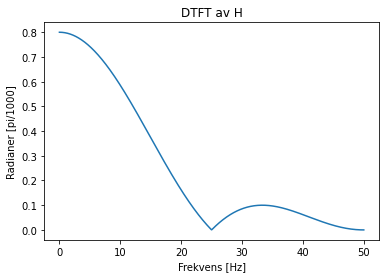

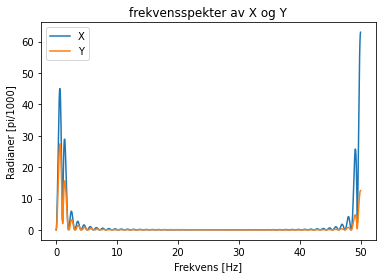

In [7]:
#plotter H først
plt.plot(hf, abs(H))
plt.title("DTFT av H")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()

#plotter X og Y 
plt.plot(fx, abs(X), fy, abs(Y))
#plot(f2, abs(Y))
plt.title("frekvensspekter av X og Y")
plt.legend(["X", "Y"])
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()



Oppgave 2:
for den neste delen skal vi jobbe med støy fjerning

In [8]:
#oppgave 2a FIR lav-pass filtere 
h1 = [0.0002, 0.0001, -0.0001, -0.0005, -0.0011, -0.0017, -0.0019, 
    -0.0016, -0.0005, 0.0015, 0.0040, 0.0064, 0.0079, 0.0075, 0.0046, 
    -0.0009, -0.0084, -0.0164, -0.0227, -0.0248, -0.0203, -0.0079, 
    0.0127, 0.0400, 0.0712, 0.1021, 0.1284, 0.1461, 0.1523, 0.1461, 
    0.1284, 0.1021, 0.0712, 0.0400, 0.0127, -0.0079, -0.0203, -0.0248, 
    -0.0227, -0.0164, -0.0084, -0.0009, 0.0046, 0.0075, 0.0079, 0.0064, 
    0.0040, 0.0015, -0.0005, -0.0016, -0.0019, -0.0017, -0.0011, 
    -0.0005, -0.0001, 0.0001, 0.0002]

h2 = [-0.0002, -0.0001, 0.0003, 0.0005, -0.0001, -0.0009, -0.0007, 
    0.0007, 0.0018, 0.0005, -0.0021, -0.0027, 0.0004, 0.0042, 0.0031, 
    -0.0028, -0.0067, -0.0023, 0.0069, 0.0091, -0.0010, -0.0127, 
    -0.0100, 0.0077, 0.0198, 0.0075, -0.0193, -0.0272, 0.0014, 0.0386, 
    0.0338, -0.0246, -0.0771, -0.0384, 0.1128, 0.2929, 0.3734, 0.2929, 
    0.1128, -0.0384, -0.0771, -0.0246, 0.0338, 0.0386, 0.0014, -0.0272, 
    -0.0193, 0.0075, 0.0198, 0.0077, -0.0100, -0.0127, -0.0010, 0.0091, 
    0.0069, -0.0023, -0.0067, -0.0028, 0.0031, 0.0042, 0.0004, -0.0027, 
    -0.0021, 0.0005, 0.0018, 0.0007, -0.0007, -0.0009, -0.0001, 0.0005, 
    0.0003, -0.0001, -0.0002]

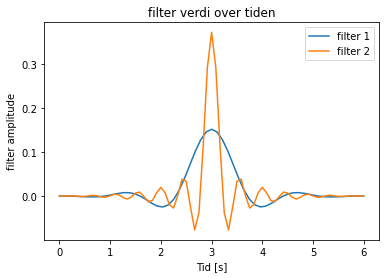

In [9]:
#oppgave 2a plotter filter over tid
time_h1 = np.linspace(0, 6, len(h1))
time_h2 = np.linspace(0, 6, len(h2))

plt.plot(time_h1, h1, time_h2, h2)
plt.title('filter verdi over tiden')
plt.legend(['filter 1', 'filter 2'])
plt.xlabel('Tid [s]')
plt.ylabel('filter amplitude')
plt.show()


<ipython-input-4-f6140131c330>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))


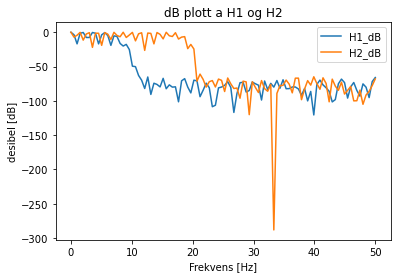

In [10]:
#plotter i frekensspekter i DB
#plotter i DB
N = 100
fs = 100

H1, H1f = frekspekin3190(h1,N, fs)
H2, H2f= frekspekin3190(h2, N, fs)

Hdb1 = 20*log10(abs(H1))
Hdb2 = 20*log10(abs(H2))

plt.plot(H1f, Hdb1, H2f, Hdb2)
plt.legend(['H1_dB', 'H2_dB'])
plt.title('dB plott a H1 og H2')
plt.xlabel("Frekvens [Hz]")
plt.ylabel("desibel [dB]")
plt.show()

fra plottet oppe, ser vi at H2 filtrer ikke så mange frekvenser som H1

Oppgave 2b

In [11]:
#importerer alle sub-filene
mat_fil = scipy.io.loadmat('vibishar.mat')

offset1 = np.array(mat_fil['offset1'])
offset2 = np.array(mat_fil['offset2'])
seis1 = np.array(mat_fil['seismogram1'])
seis2 = np.array(mat_fil['seismogram2'])
time = np.array(mat_fil['t']) 

print('lenth of time array:', len(time))
print('lenth of seis1 array:', len(seis1))
print('lenth of seis2 array:', len(seis2))

lenth of time array: 1501
lenth of seis1 array: 1501
lenth of seis2 array: 1501


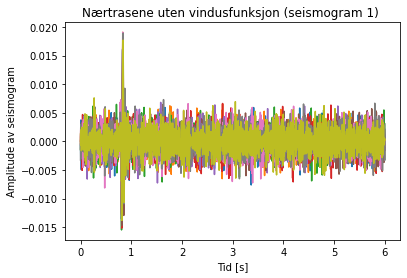

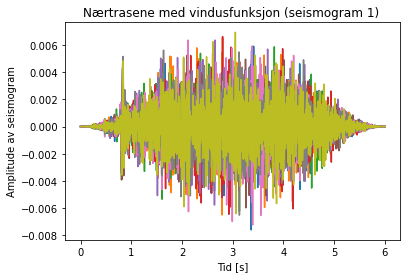

In [29]:
#tar en liten del av data-mengden
seis1_short = seis1[:, 0:9] #tar de første 10 data mengdene
seis2_short = seis2[:, 0:9] #tar de første 10 datamengder
time_short = time[:]

#vindus funksjon:
vin1 = tukey(len(seis1_short), 0.9) 
vin2 = tukey(len(seis2_short), 0.9)

#plotter seismogram 1
plt.title('Nærtrasene uten vindusfunksjon (seismogram 1) ')
plt.plot(time_short, seis1_short)
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

"""
#plotter seismogram 2
plt.title('Nærtrasene uten vindusfunksjon (seismogram 2) ')
plt.plot(time_short, seis2_short)
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()
"""
#funksjon for å bruke vindusfunksjon
def window(seismogram_info):
    M, N = np.shape(seismogram_info)
    with_window = np.zeros((M,N))
    for i in range (N):
        with_window[:,i] = tukey(len(seismogram_info), 0.8)*seismogram_info[:,i]
    
    return with_window


#plotter det med vindusfunksjon seperat fordi det ble rotete, plotter første 10
plt.title('Nærtrasene med vindusfunksjon (seismogram 1) ')
plt.plot(time_short, window(seis1[:,0:9]))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()


Oppgave 2c: avender filtere på signalen

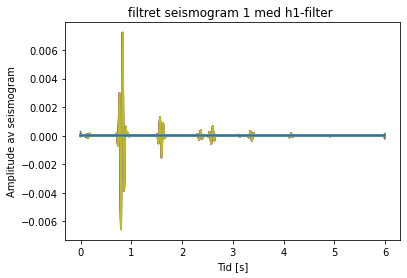

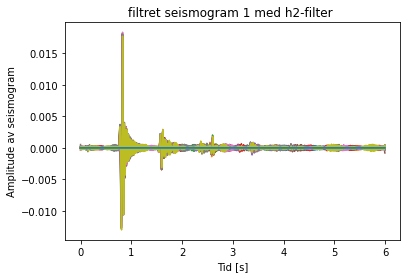

In [50]:
m,n = np.shape(seis1)
def filter_seis(seismogram, filter_type):
    m,n = np.shape(seismogram)
    filtered = np.zeros((m-1,n)) #tom array for filterert seismogram

    #filterer en rad om gangen ved å bruke hvor konvin funksjon:
    for i in range(9):  #første fem radene
        filtered[:,i] = konvin3190(seismogram[:,i],0, filter_type)
    return filtered

plt.title('filtret seismogram 1 med h1-filter ')
plt.plot(time[0:m-1], filter_seis(seis1, h1))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

plt.title('filtret seismogram 1 med h2-filter ')
plt.plot(time[0:m-1], filter_seis(seis1, h2))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

Oppgave 3a: Fjernfeltssignatur

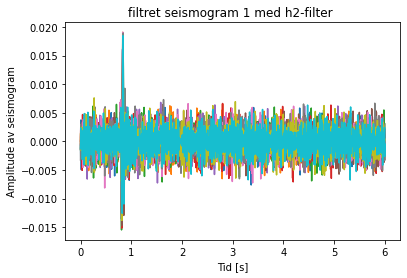

In [19]:
#får frekvenssepktret av filtret Y1 og Y2':
Y1, Y2 = filter_seis(seis1, h1), filter_seis(seis1, h2)
win_Y1, win_Y2 =  window(Y1), window(Y2)
frk_Y1, fs_Y1 = frekspekin3190(win_Y1, N, fs)
frk_Y2, fs_Y2 = frekspekin3190(win_Y2, N, fs)

#frekvensspekteret av offset 1
offset1_frek, offset1_fs = frekspekin3190()